# Word Cloud Generation for ArXiv Datasets
Generate word clouds from bag-of-words datasets for each category (math, physics, stat, eess, cs)
- Overall word clouds per category
- Periodic (yearly) word clouds based on submitted_date

In [1]:
import pandas as pd
import ast
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
BASE_DIR = Path("..")
DATASET_DIR = BASE_DIR / "dataset"
OUTPUT_DIR = Path("wordcloud")

CATEGORIES = ["math", "physics", "stat", "eess", "cs"]

In [3]:
def get_word_frequencies(texts) -> Counter:
    """Count word frequencies from a series of text lists."""
    word_counter = Counter()
    
    for text in texts:
        try:
            words = ast.literal_eval(text) if isinstance(text, str) else text
            word_counter.update(words)
        except (ValueError, SyntaxError):
            continue
    
    return word_counter

In [4]:
def generate_wordcloud(word_freq: Counter, output_path: str, title: str):
    """Generate and save a word cloud image."""
    if not word_freq:
        print(f"Skipping {title}: No words found")
        return
    
    wc = WordCloud(
        width=1600,
        height=800,
        background_color="white",
        max_words=200,
        colormap="viridis",
        random_state=42
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20, fontweight="bold")
    plt.tight_layout()
    plt.savefig(output_path, dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()
    
    print(f"Saved: {output_path}")

## Generate Overall Word Clouds (All Years Combined)


Processing Overall: MATH
Total unique words: 88964
Top 10 words: [('function', 50961), ('space', 47529), ('group', 45587), ('graph', 36284), ('theory', 28573), ('class', 28095), ('set', 27955), ('non', 26952), ('type', 26609), ('property', 26329)]


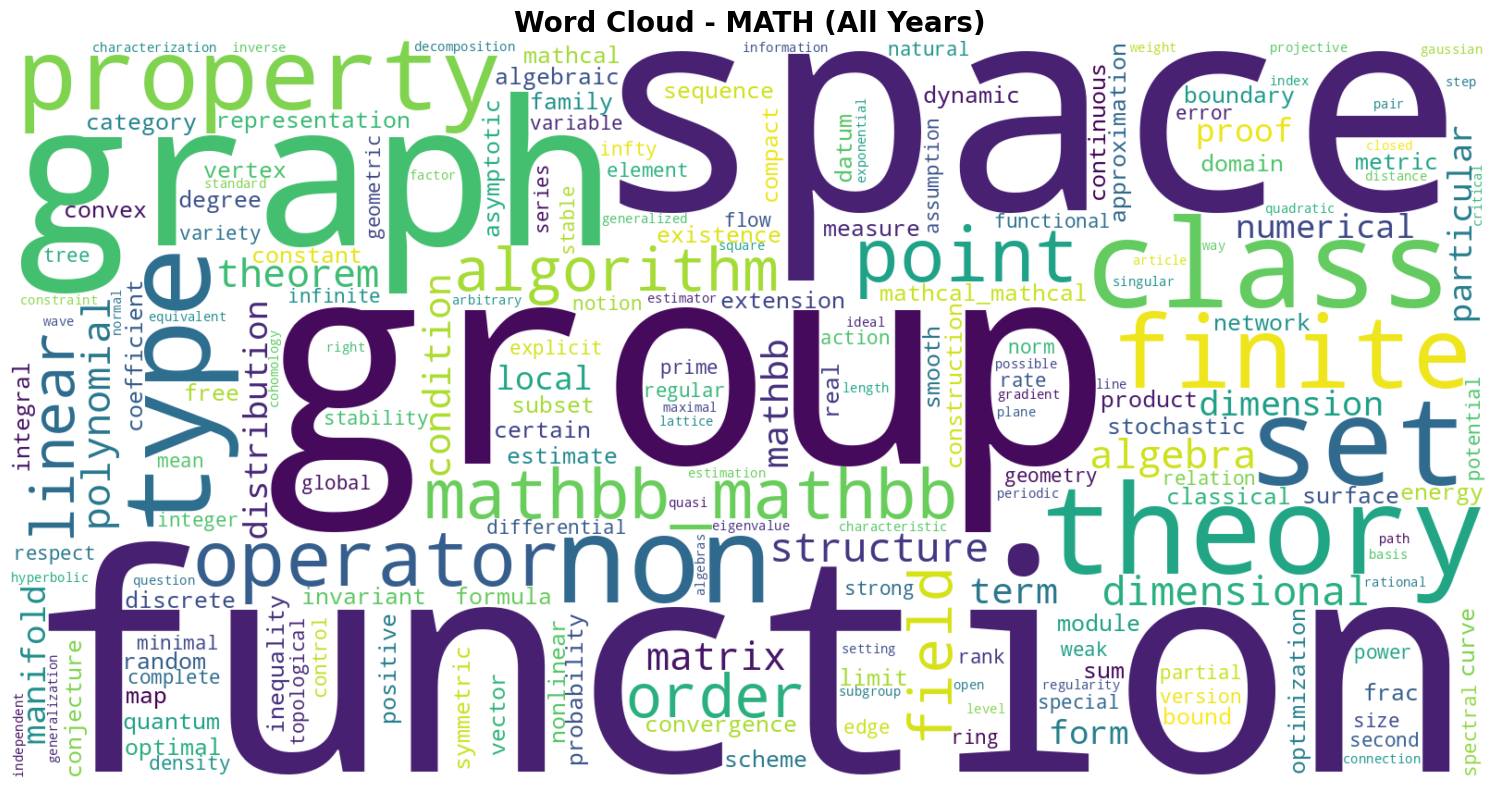

Saved: wordcloud/math/wordcloud.png

Processing Overall: PHYSICS
Total unique words: 122859
Top 10 words: [('energy', 62837), ('field', 51783), ('dynamic', 46861), ('quantum', 46028), ('effect', 42761), ('structure', 41952), ('network', 41729), ('wave', 41500), ('datum', 41385), ('optical', 39002)]


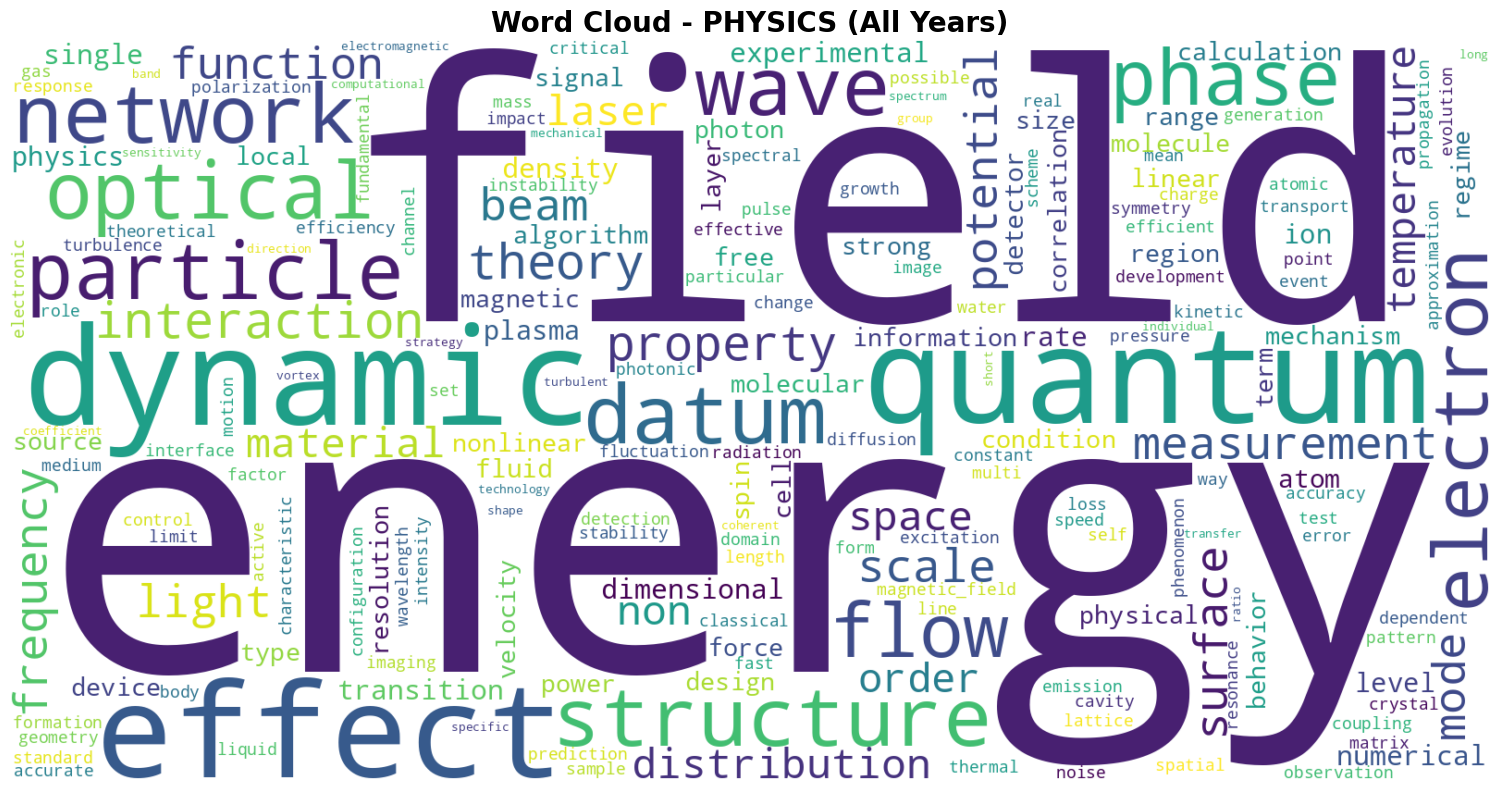

Saved: wordcloud/physics/wordcloud.png

Processing Overall: STAT
Total unique words: 40148
Top 10 words: [('datum', 32959), ('algorithm', 18365), ('distribution', 14011), ('network', 11262), ('function', 11261), ('estimation', 8543), ('bayesian', 8323), ('inference', 7463), ('dataset', 7422), ('sample', 7331)]


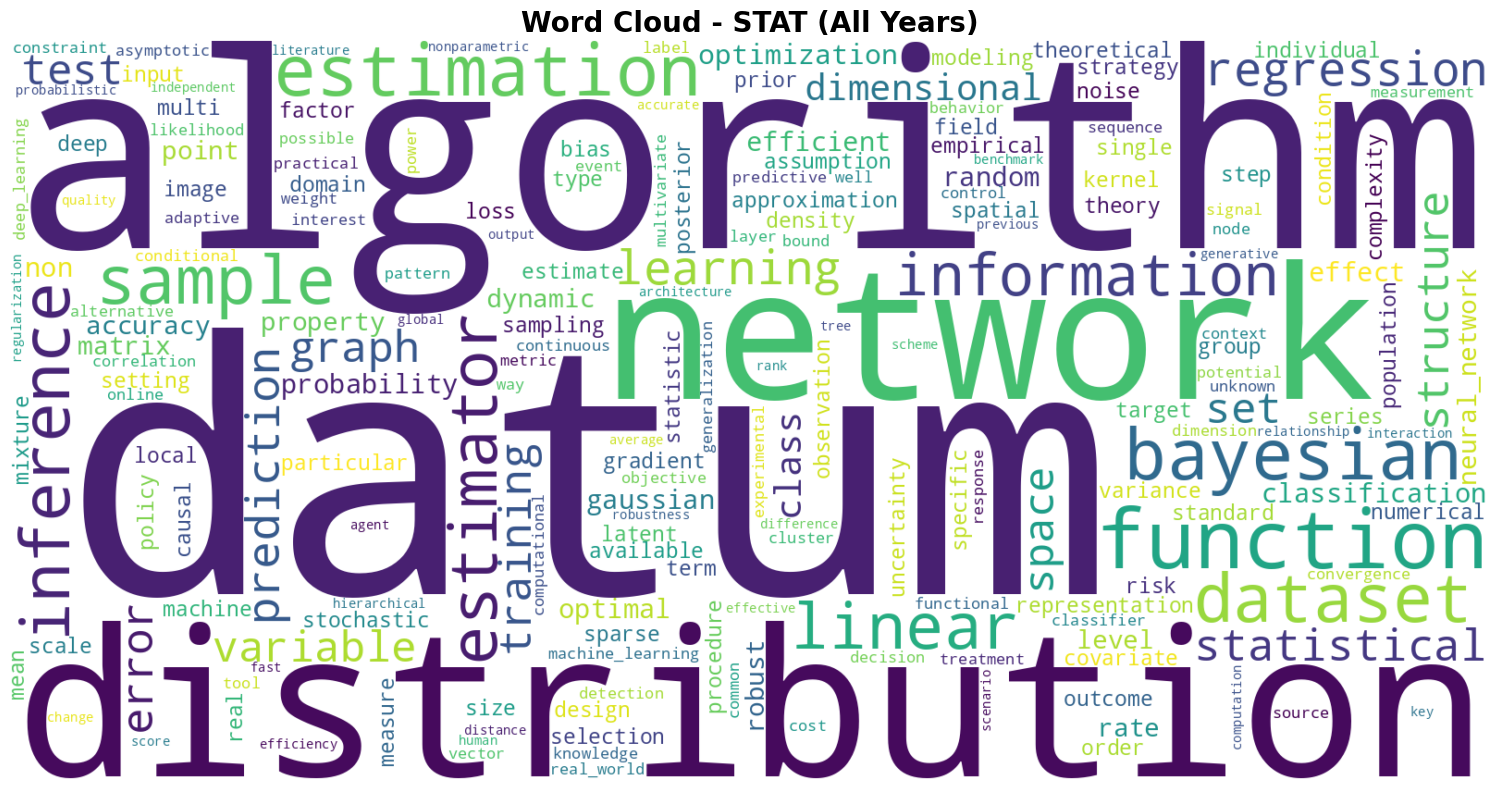

Saved: wordcloud/stat/wordcloud.png

Processing Overall: EESS
Total unique words: 43809
Top 10 words: [('datum', 18090), ('network', 17800), ('control', 16283), ('image', 16030), ('algorithm', 14351), ('signal', 9335), ('power', 8746), ('information', 8609), ('dataset', 8439), ('dynamic', 8185)]


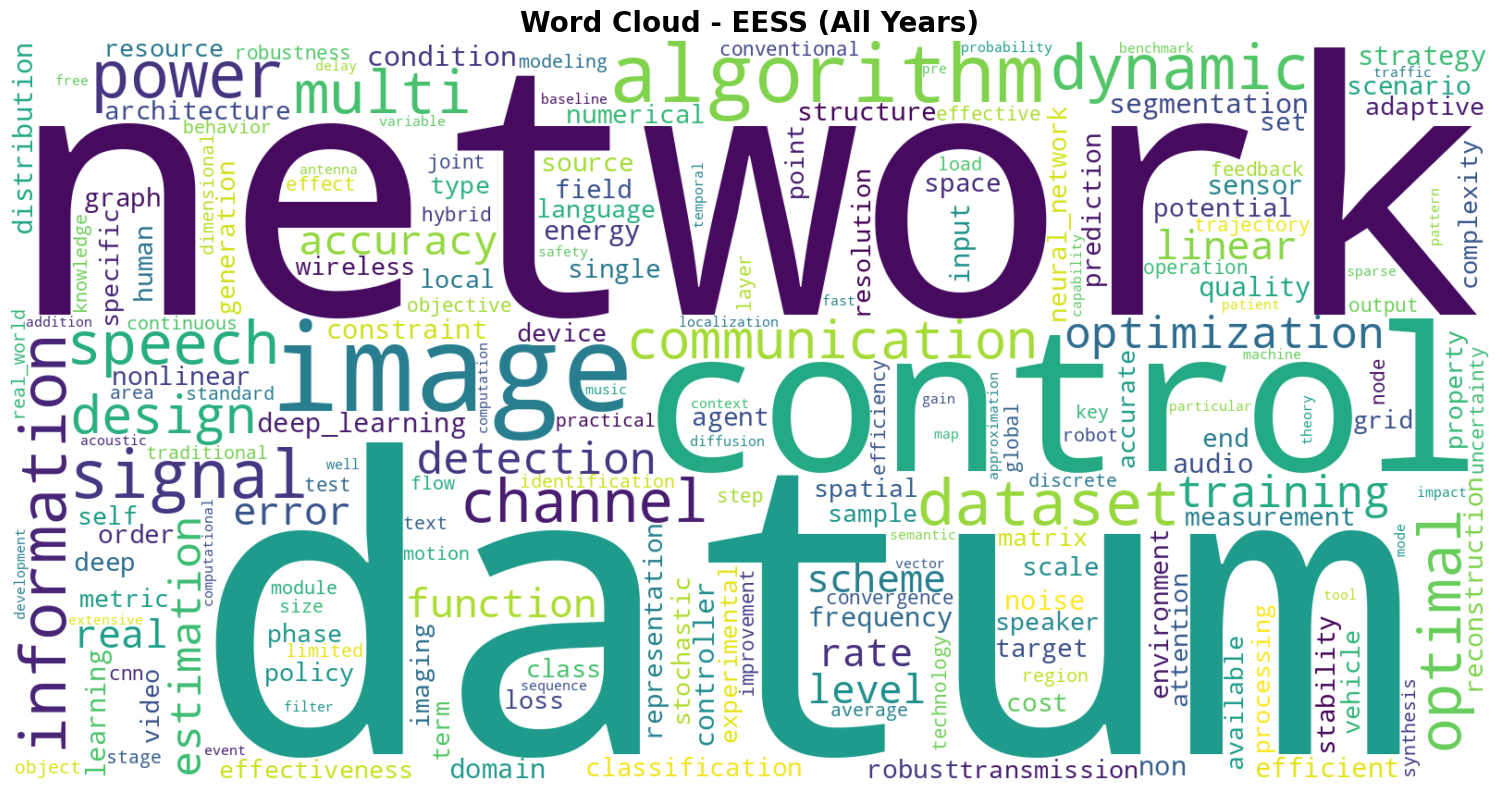

Saved: wordcloud/eess/wordcloud.png

Processing Overall: CS
Total unique words: 146603
Top 10 words: [('datum', 116032), ('algorithm', 81182), ('network', 80079), ('image', 76073), ('dataset', 65819), ('information', 53444), ('graph', 51348), ('language', 46147), ('training', 45569), ('multi', 39132)]


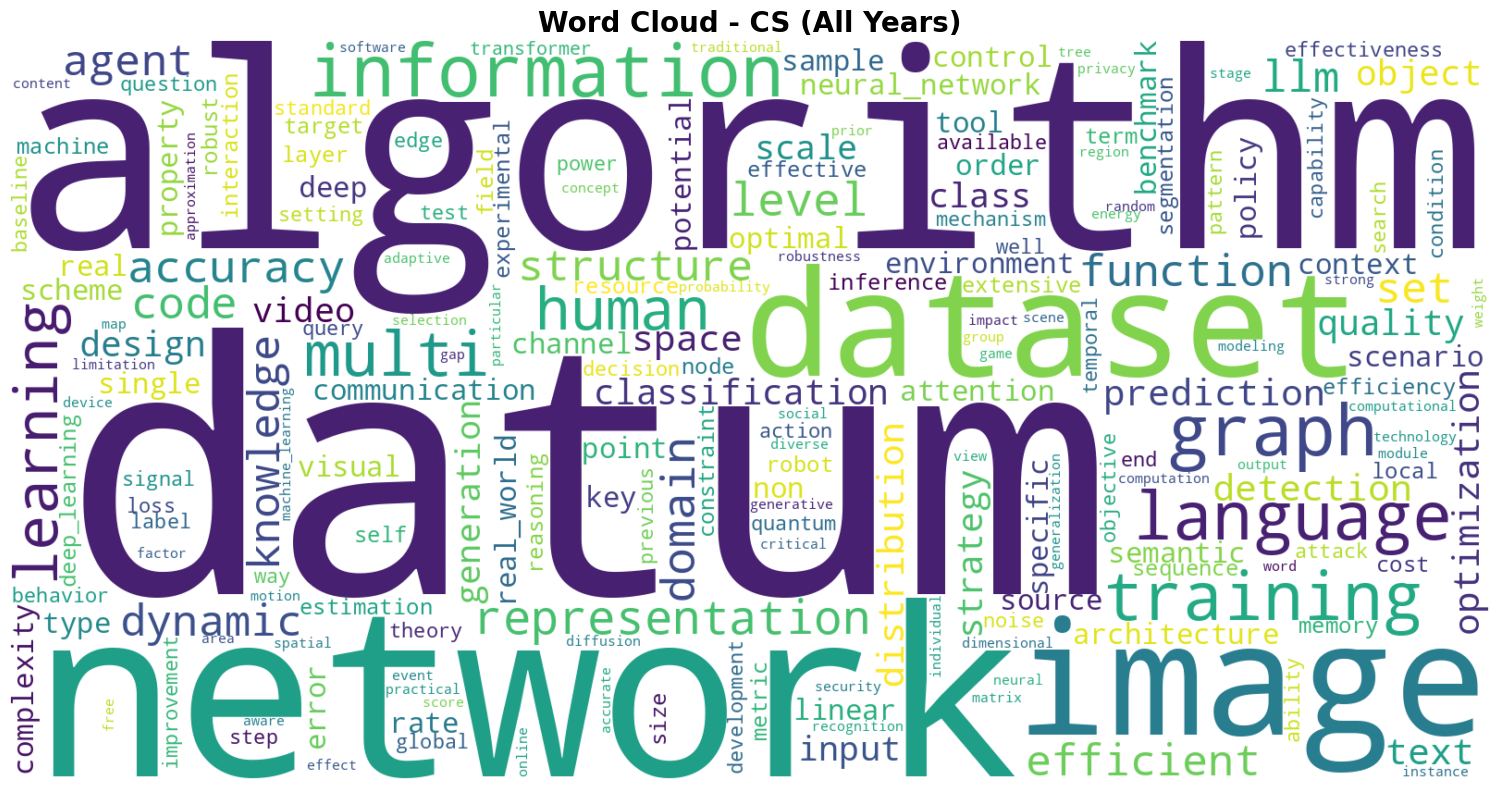

Saved: wordcloud/cs/wordcloud.png

Overall word clouds completed!


In [5]:
for category in CATEGORIES:
    print(f"\n{'='*50}")
    print(f"Processing Overall: {category.upper()}")
    print(f"{'='*50}")
    
    csv_path = DATASET_DIR / category / "bow" / "v1.csv"
    
    if not csv_path.exists():
        print(f"File not found: {csv_path}")
        continue
    
    output_folder = OUTPUT_DIR / category
    output_folder.mkdir(parents=True, exist_ok=True)
    
    df = pd.read_csv(csv_path)
    word_freq = get_word_frequencies(df["text"])
    print(f"Total unique words: {len(word_freq)}")
    print(f"Top 10 words: {word_freq.most_common(10)}")
    
    output_path = output_folder / "wordcloud.png"
    generate_wordcloud(word_freq, output_path, f"Word Cloud - {category.upper()} (All Years)")

print("\nOverall word clouds completed!")

## Generate Periodic (Yearly) Word Clouds

In [ ]:
for category in CATEGORIES:
    print(f"\n{'='*50}")
    print(f"Processing Periodic: {category.upper()}")
    print(f"{'='*50}")
    
    csv_path = DATASET_DIR / category / "bow" / "v1.csv"
    
    if not csv_path.exists():
        print(f"File not found: {csv_path}")
        continue
    
    periodic_folder = OUTPUT_DIR / category / "periodic"
    periodic_folder.mkdir(parents=True, exist_ok=True)
    
    df = pd.read_csv(csv_path)
    df["submitted_date"] = pd.to_datetime(df["submitted_date"])
    df["year"] = df["submitted_date"].dt.year
    
    years = sorted(df["year"].dropna().unique())
    print(f"Years found: {years[0]} - {years[-1]} ({len(years)} years)")
    
    for year in years:
        year_df = df[df["year"] == year]
        word_freq = get_word_frequencies(year_df["text"])
        
        output_path = periodic_folder / f"wordcloud_{int(year)}.png"
        generate_wordcloud(word_freq, output_path, f"{category.upper()} - {int(year)}")
    
    print(f"Generated {len(years)} yearly word clouds for {category}")

print("\n" + "="*50)
print("All periodic word clouds generated!")
print("="*50)

## Summary

In [7]:
print("Generated word cloud files:")
for category in CATEGORIES:
    print(f"\n{category.upper()}:")
    
    overall_path = OUTPUT_DIR / category / "wordcloud.png"
    if overall_path.exists():
        print(f"  ✓ Overall: {overall_path}")
    
    periodic_folder = OUTPUT_DIR / category / "periodic"
    if periodic_folder.exists():
        yearly_files = sorted(periodic_folder.glob("wordcloud_*.png"))
        print(f"  ✓ Periodic: {len(yearly_files)} yearly word clouds")

Generated word cloud files:

MATH:
  ✓ Overall: wordcloud/math/wordcloud.png
  ✓ Periodic: 26 yearly word clouds

PHYSICS:
  ✓ Overall: wordcloud/physics/wordcloud.png
  ✓ Periodic: 26 yearly word clouds

STAT:
  ✓ Overall: wordcloud/stat/wordcloud.png
  ✓ Periodic: 23 yearly word clouds

EESS:
  ✓ Overall: wordcloud/eess/wordcloud.png
  ✓ Periodic: 19 yearly word clouds

CS:
  ✓ Overall: wordcloud/cs/wordcloud.png
  ✓ Periodic: 26 yearly word clouds
